# test_d25a.ipynb
Test functions contained in d25a.py.

Author: Benjamin S. Grandey

In [1]:
! date

Fri Apr 25 13:24:55 +08 2025


In [2]:
import d25a
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
# Print package versions
print(d25a.get_watermark())

Python implementation: CPython
Python version       : 3.10.16
IPython version      : 8.31.0

matplotlib: 3.10.0
numpy     : 2.2.2
pandas    : 2.2.3
seaborn   : 0.13.2
xarray    : 2025.1.1

conda environment: d25a-rsl-fusion

Compiler    : Clang 18.1.8 
OS          : Darwin
Release     : 22.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



## Functions used by data_d25a.ipynb

In [4]:
# Gauge info
d25a.get_gauge_info(gauge='TANJONG_PAGAR')

{'gauge_name': 'TANJONG_PAGAR',
 'gauge_id': np.int64(1746),
 'lat': np.float64(1.27),
 'lon': np.float64(103.85),
 'country': 'SINGAPORE'}

In [5]:
# Fusion under SSP5-8.5
qfs_da = d25a.get_sl_qfs(workflow='fusion_1e+2e', slr_str='rsl', scenario='ssp585')
qfs_da

<xarray.DataArray 'sea_level_change' (quantiles: 107, years: 9, locations: 1030)> Size: 8MB
array([[[-9.20000000e-02, -1.63000000e-01, -1.11000000e-01, ...,
         -7.40000000e-02, -8.20000000e-02, -1.11000000e-01],
        [-1.31000000e-01, -1.86000000e-01, -1.48000000e-01, ...,
         -1.10000000e-02, -4.10000000e-02, -1.15000000e-01],
        [-1.37000000e-01, -2.01000000e-01, -1.87000000e-01, ...,
         -3.90000000e-02, -7.20000000e-02, -9.50000000e-02],
        ...,
        [-2.45000000e-01, -2.51000000e-01, -2.65000000e-01, ...,
         -1.43000000e-01, -1.64000000e-01, -1.55000000e-01],
        [-2.51000000e-01, -2.58000000e-01, -2.58000000e-01, ...,
         -1.71000000e-01, -1.43000000e-01, -1.63000000e-01],
        [-3.25000000e-01, -3.87000000e-01, -3.42000000e-01, ...,
         -2.75000000e-01, -2.17000000e-01, -1.85000000e-01]],

       [[-4.79911765e-02, -8.89911765e-02, -5.39911765e-02, ...,
         -2.59941176e-02, -2.99941176e-02, -5.99911765e-02],
        [-6.38823529e-02, -8.89088235e-02, -6.88823529e-02, ...,
          1.41029412e-02,  5.04705882e-03, -4.59882353e-02],
        [-5.27588235e-02, -8.08235294e-02, -7.47705882e-02, ...,
          6.25588235e-03, -1.18000000e-02, -1.98941176e-02],
...
          2.59488824e+00,  2.72080000e+00,  2.43787059e+00],
        [ 2.98154706e+00,  2.92302059e+00,  3.02669412e+00, ...,
          3.42190588e+00,  3.66830588e+00,  3.29758824e+00],
        [ 3.92594118e+00,  3.83285000e+00,  3.93336471e+00, ...,
          4.61715294e+00,  4.91437647e+00,  4.38820588e+00]],

       [[ 2.45000000e-01,  2.99000000e-01,  2.78000000e-01, ...,
          2.38000000e-01,  2.31000000e-01,  2.37000000e-01],
        [ 4.28000000e-01,  4.79000000e-01,  4.69000000e-01, ...,
          4.23000000e-01,  4.66000000e-01,  4.45000000e-01],
        [ 6.63000000e-01,  6.90000000e-01,  7.04000000e-01, ...,
          7.62000000e-01,  8.75000000e-01,  7.92000000e-01],
        ...,
        [ 2.71900000e+00,  2.64600000e+00,  2.75500000e+00, ...,
          2.91800000e+00,  3.15400000e+00,  2.86400000e+00],
        [ 3.35100000e+00,  3.25800000e+00,  3.39100000e+00, ...,
          3.82100000e+00,  4.14300000e+00,  3.75200000e+00],
        [ 4.26900000e+00,  4.14700000e+00,  4.30000000e+00, ...,
          4.89900000e+00,  5.31500000e+00,  4.75900000e+00]]],
      shape=(107, 9, 1030))
Coordinates:
  * years      (years) int64 72B 2020 2030 2040 2050 2060 2070 2080 2090 2100
  * locations  (locations) int64 8kB 1 2 3 5 7 8 ... 2326 2329 2330 2356 2358
  * quantiles  (quantiles) float64 856B 0.0 0.001 0.005 0.01 ... 0.995 0.999 1.0
Attributes:
    units:    m

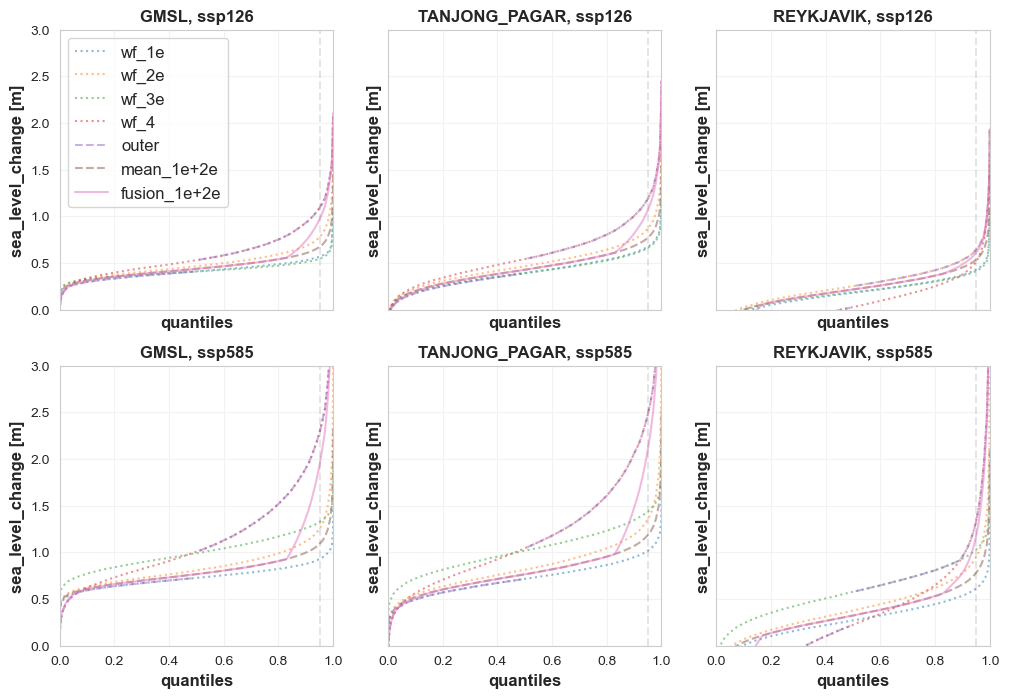

In [6]:
# Do fusion results look reasonable?
# Create subplot panels
fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
# Loop over locations, scenarios, and corresponding axes
for g, gauge in enumerate([None, 'TANJONG_PAGAR', 'REYKJAVIK']):
    for s, scenario in enumerate(['ssp126', 'ssp585']):
        ax = axs[s, g]
        # Loop over workflows
        for workflow in ['wf_1e', 'wf_2e', 'wf_3e', 'wf_4', 'outer', 'mean_1e+2e', 'fusion_1e+2e']:
            # Get data for 2100
            if gauge:  # RSL
                qfs_da = d25a.get_sl_qfs(workflow=workflow, slr_str='rsl', scenario=scenario).sel(years=2100)
                qfs_da = qfs_da.sel(locations=d25a.get_gauge_info(gauge=gauge)['gauge_id'])
            else:  # GMSL
                qfs_da = d25a.get_sl_qfs(workflow=workflow, slr_str='gmsl', scenario=scenario).sel(years=2100)
            # Plot data
            if 'wf' in workflow:
                linestyle = ':'
            elif workflow == 'fusion_1e+2e':
                linestyle = '-'
            else:
                linestyle = '--'
            qfs_da.plot(ax=ax, linestyle=linestyle, alpha=0.5, label=workflow)
        # Show 95th percentile
        ax.axvline(0.95, alpha=0.1, linestyle='--', color='k')
        # Customize title etc
        if gauge:
            ax.set_title(f'{gauge}, {scenario}')
        else:
            ax.set_title(f'GMSL, {scenario}')
        if g == 0 and s == 0:
            ax.legend()
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 3)

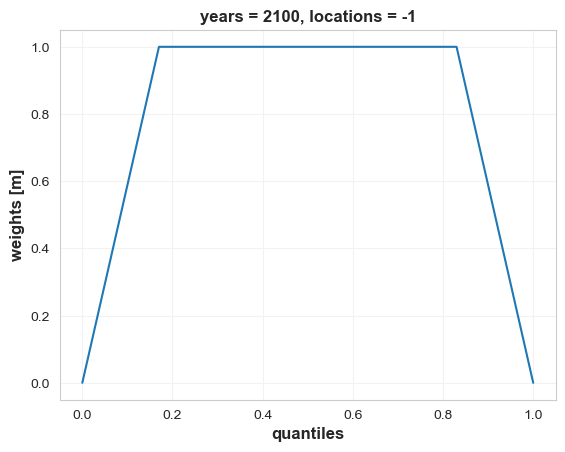

In [7]:
# Fusion weights
w_da = d25a.get_fusion_weights()
w_da.plot()

## Functions used by figs_d25a.ipynb

Text(0.5, 1.0, 'GMSL')

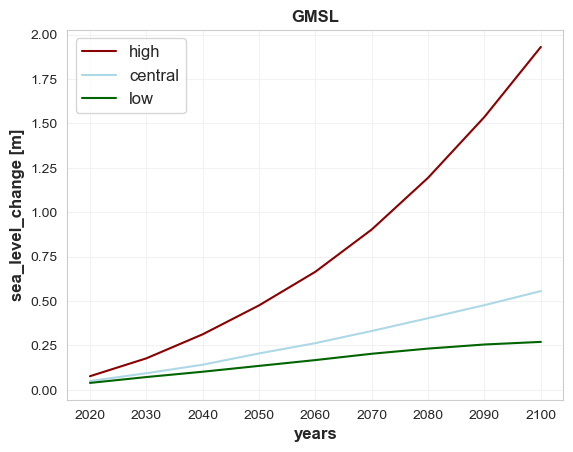

In [8]:
# High, low, and central time series of GMSL
for high_low_central, color in [('high', 'darkred'), ('central', 'lightblue'), ('low', 'darkgreen')]:
    proj_ts_da = d25a.read_proj_ts_da(slr_str='gmsl', fusion_high_low_central=high_low_central, scenario=None)
    proj_ts_da.plot(color=color, label=high_low_central)
plt.legend()
plt.title('GMSL')

Text(0.5, 1.0, 'RSL at FORT_PHRACHULA_CHOMKLAO')

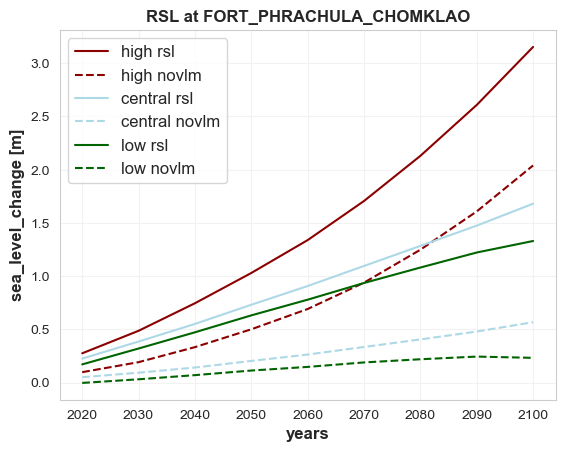

In [9]:
# High, low, and central time series of RSL at a specific gauge
gauge_info = d25a.get_gauge_info(gauge=444)
for high_low_central, color in [('high', 'darkred'), ('central', 'lightblue'), ('low', 'darkgreen')]:
    for slr_str, linestyle in [('rsl', '-'), ('novlm', '--')]:
        proj_ts_da = d25a.read_proj_ts_da(slr_str=slr_str, fusion_high_low_central=high_low_central, scenario=None)
        proj_ts_da = proj_ts_da.sel(locations=gauge_info['gauge_id'])
        proj_ts_da.plot(color=color, linestyle=linestyle, label=f'{high_low_central} {slr_str}')
plt.legend()
plt.title(f'RSL at {gauge_info["gauge_name"]}')

In [10]:
# Probability of exceeding high-end
high_ts_da = d25a.read_proj_ts_da(slr_str='gmsl', fusion_high_low_central='high', scenario=None)
for scenario in ['ssp585', 'ssp126']:
    proj_ts_da = d25a.read_proj_ts_da(slr_str='gmsl', fusion_high_low_central='fusion', scenario=scenario)
    proj_ts_da = proj_ts_da.interp(quantiles=np.linspace(0, 1, 20001), method='linear')
    print(f'P(GMSL > high-end | {scenario}), %:')
    print((proj_ts_da > high_ts_da).mean(dim='quantiles').data * 100)

P(GMSL > high-end | ssp585), %:
[[5.00474976]
 [5.00474976]
 [5.00474976]
 [5.00474976]
 [5.00474976]
 [5.00474976]
 [5.00474976]
 [5.00474976]
 [5.00474976]]
P(GMSL > high-end | ssp126), %:
[[3.83480826]
 [2.71986401]
 [2.22488876]
 [1.639918  ]
 [0.959952  ]
 [0.5499725 ]
 [0.31498425]
 [0.19999   ]
 [0.139993  ]]


In [11]:
# Year-2100 projections
mega_df = d25a.read_proj_2100_df(gauges_cities_megacities='megacities')
mega_df

,city_index,city_name,city_country,city_lat,city_lon,population_2025_1000s,gauge_id,gauge_name,gauge_lat,gauge_lon,distance_km,rsl_low,rsl_central,rsl_high,novlm_low,novlm_central,novlm_high,city_short,region
0,1088,Tokyo,Japan,35.69,139.69,37036,1545,TOKYO_III,35.65,139.77,8,0.06,0.45,2.07,0.25,0.62,2.25,Tokyo,asia
1,808,Delhi,India,28.67,77.22,34666,420,BHAUNAGAR_I,21.80,72.30,910,NaN,NaN,NaN,NaN,NaN,NaN,Delhi,asia
2,449,Shanghai,China,31.22,121.46,30482,979,LUSI,32.13,121.62,102,NaN,NaN,NaN,NaN,NaN,NaN,Shanghai,asia
3,61,Dhaka,Bangladesh,23.71,90.41,24653,1496,CHARCHANGA,22.22,91.05,178,NaN,NaN,NaN,NaN,NaN,NaN,Dhaka,asia
4,685,Al-Qahirah (Cairo),Egypt,30.04,31.24,23074,253,PORT_SAID,31.25,32.30,169,NaN,NaN,NaN,NaN,NaN,NaN,Cairo,other
5,138,São Paulo,Brazil,-23.55,-46.64,22990,726,CANANEIA,-25.02,-47.93,210,NaN,NaN,NaN,NaN,NaN,NaN,São Paulo,other
6,1147,Ciudad de México (Mexico City),Mexico,19.43,-99.14,22752,918,TUXPAN,21.00,-97.33,258,NaN,NaN,NaN,NaN,NaN,NaN,Mexico City,other
7,204,Beijing,China,39.91,116.40,22596,1403,TANGGU,39.00,117.72,152,NaN,NaN,NaN,NaN,NaN,NaN,Beijing,asia
8,882,Mumbai (Bombay),India,19.07,72.88,22089,43,MUMBAI,18.92,72.83,18,0.14,0.46,1.94,0.20,0.51,1.99,Mumbai,asia
9,1758,New York-Newark,United States of America,40.72,-74.00,19154,12,NEW_YORK,40.70,-74.01,2,0.40,0.81,2.21,0.26,0.67,2.07,New York,other


In [12]:
# Summary statistics
for gauges_cities_megacities in ['gauges', 'cities', 'megacities']:
    print(f'{gauges_cities_megacities}:')
    summary_df = d25a.get_proj_2100_summary_df(gauges_cities_megacities=gauges_cities_megacities)
    print(summary_df)
    print()

gauges:
            rsl_low  rsl_central     rsl_high    novlm_low novlm_central  \
Median          0.2          0.6          2.0          0.2           0.6   
IQR      0.1 to 0.3   0.5 to 0.6   1.8 to 2.2   0.2 to 0.2    0.6 to 0.6   
Range   -1.9 to 2.0  -1.5 to 2.4  -0.1 to 4.0  -1.2 to 0.3   -0.4 to 0.7   
Count          1016         1016         1016         1016          1016   

        novlm_high  
Median         2.0  
IQR     1.8 to 2.1  
Range   0.5 to 2.4  
Count         1016  

cities:
            rsl_low rsl_central    rsl_high   novlm_low novlm_central  \
Median          0.2         0.6         2.0         0.2           0.6   
IQR      0.1 to 0.3  0.5 to 0.7  1.9 to 2.2  0.2 to 0.2    0.6 to 0.6   
Range   -0.3 to 1.6  0.0 to 2.0  1.3 to 3.4  0.0 to 0.3    0.4 to 0.7   
Count           430         430         430         430           430   

        novlm_high  
Median         2.1  
IQR     1.9 to 2.1  
Range   1.7 to 2.4  
Count          430  

megacities:
            r

In [13]:
# Country stats
d25a.get_country_stats_df()

,index,gauge_country,country,count,low_med,low_min,low_max,central_med,central_min,central_max,high_med,high_min,high_max
0,27,FINLAND,Finland,24.0,-0.480,-0.78,-0.15,-0.020,-0.29,0.30,1.185,0.89,1.52
1,112,ÅLAND ISLANDS,Åland Islands,4.0,-0.415,-0.46,-0.40,0.035,-0.00,0.06,1.255,1.21,1.28
2,73,NORWAY,Norway,26.0,-0.225,-0.38,-0.01,0.290,0.14,0.48,1.430,1.27,1.70
3,96,SWEDEN,Sweden,33.0,-0.140,-0.83,0.10,0.290,-0.33,0.55,1.500,0.84,1.76
4,18,CROATIA,Croatia,7.0,0.110,0.09,0.15,0.470,0.45,0.51,1.740,1.71,1.80
5,12,CHILE,Chile,13.0,0.080,-0.04,0.27,0.380,0.26,0.58,1.750,1.31,1.95
6,104,UNITED KINGDOM,United Kingdom,43.0,0.110,-0.08,0.19,0.540,0.39,0.66,1.770,1.58,1.90
7,9,CANADA,Canada,37.0,0.060,-0.87,0.39,0.420,-0.39,0.87,1.770,1.03,2.27
8,20,DENMARK,Denmark,15.0,0.100,-0.01,0.16,0.560,0.43,0.64,1.790,1.66,1.88
9,46,ITALY,Italy,11.0,0.150,0.11,0.23,0.510,0.48,0.59,1.810,1.73,1.89


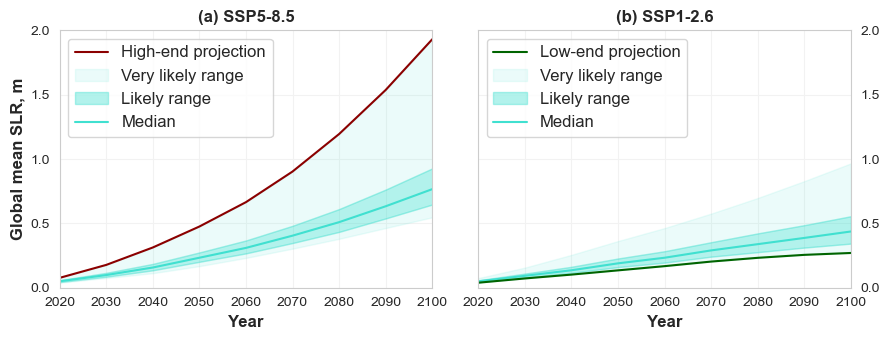

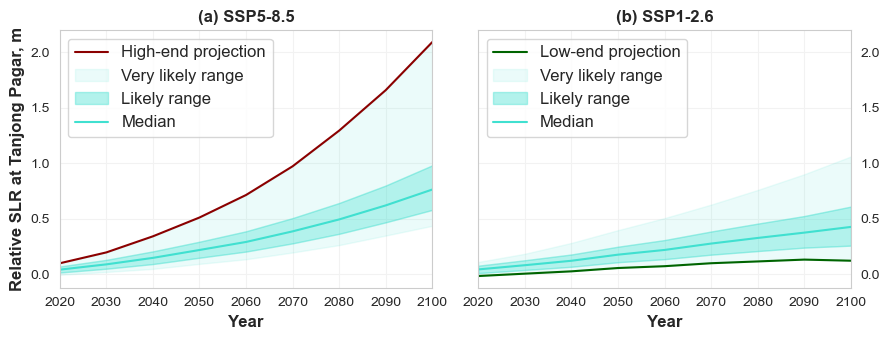

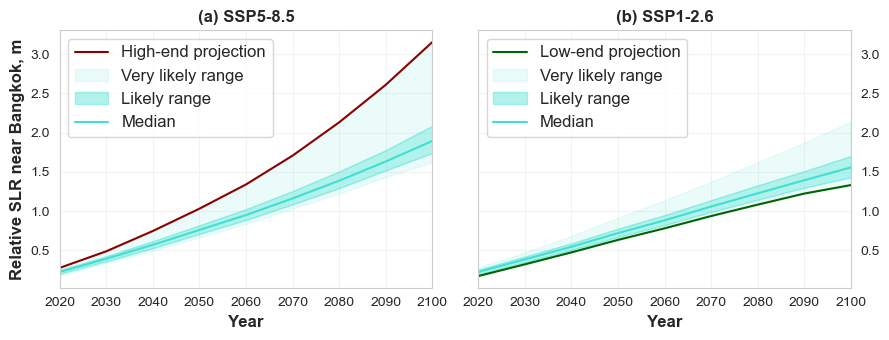

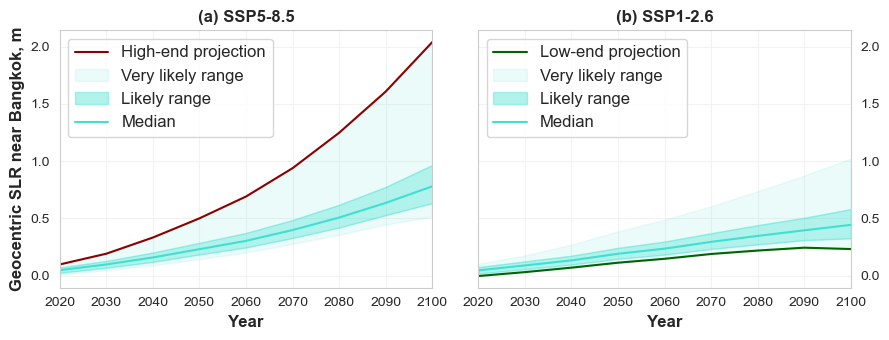

In [14]:
# Fusion time series
fig, axs = d25a.fig_fusion_ts(gauge_city=None, slr_str='gmsl')
fig, axs = d25a.fig_fusion_ts(gauge_city='TANJONG_PAGAR', slr_str='rsl')
fig, axs = d25a.fig_fusion_ts(gauge_city='Bangkok', slr_str='rsl')
fig, axs = d25a.fig_fusion_ts(gauge_city='Bangkok', slr_str='novlm')

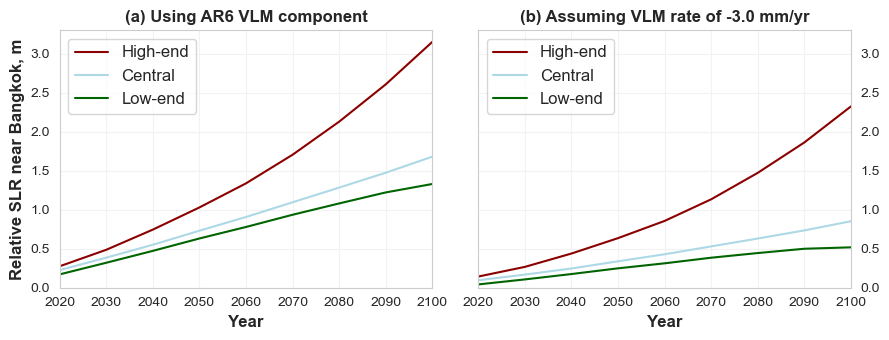

In [15]:
# Time series of high-end, central, and low-end projections using (a) AR6 VLM and (b) assumed VLM rate
fig, axs = d25a.fig_vlm_sensitivity_ts()

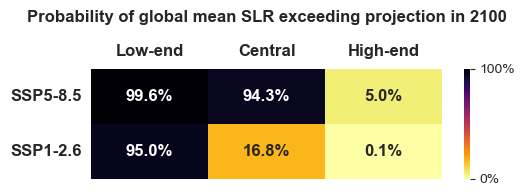

In [16]:
# Probability of exceeding GMSL projections
fig, ax = d25a.fig_p_exceed_heatmap()

megacities asia
Plotting 11 megacity locations with no gauge nearby.
Plotting projection for 11 locations.
megacities other
Plotting 10 megacity locations with no gauge nearby.
Plotting projection for 5 locations.
megacities None
Plotting 21 megacity locations with no gauge nearby.
Plotting projection for 16 locations.
cities asia
Plotting projection for 215 locations.
cities other
Plotting projection for 215 locations.
cities None
Plotting projection for 430 locations.
gauges asia
Plotting projection for 410 locations.
gauges other
Plotting projection for 606 locations.
gauges None
Plotting projection for 1016 locations.


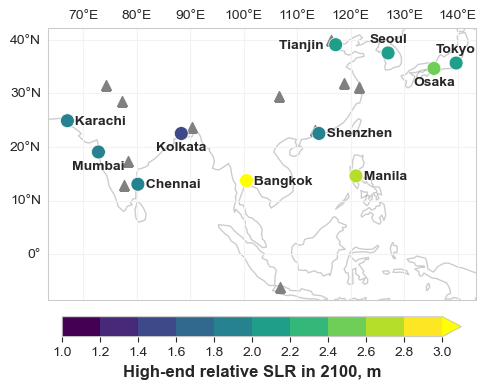

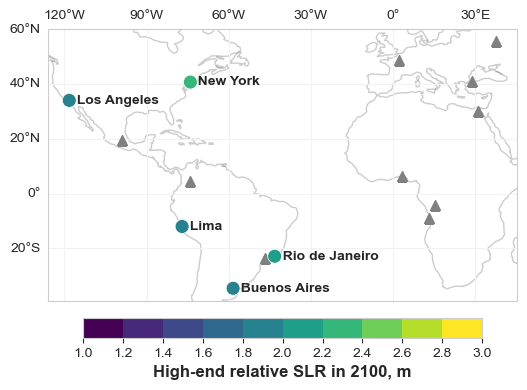

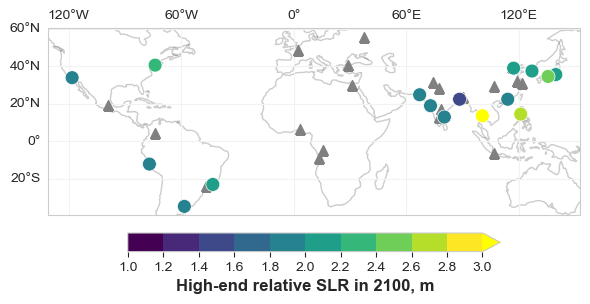

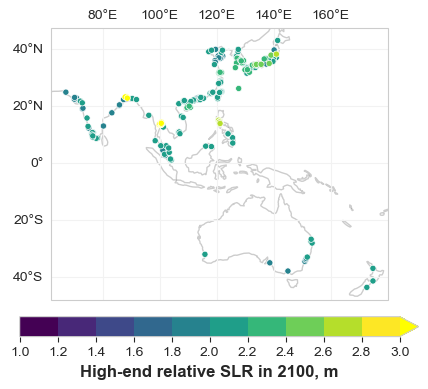

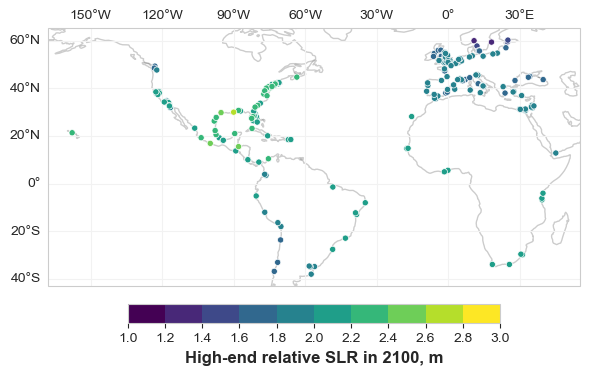

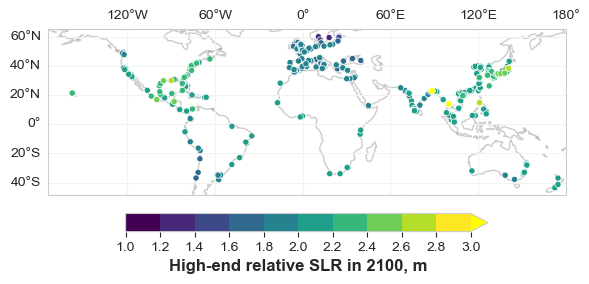

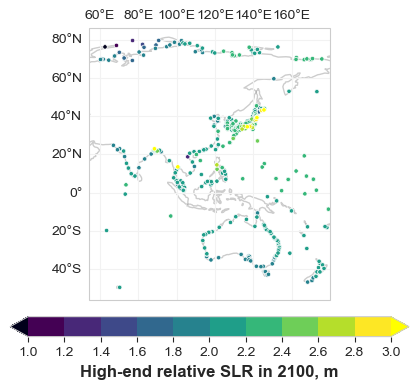

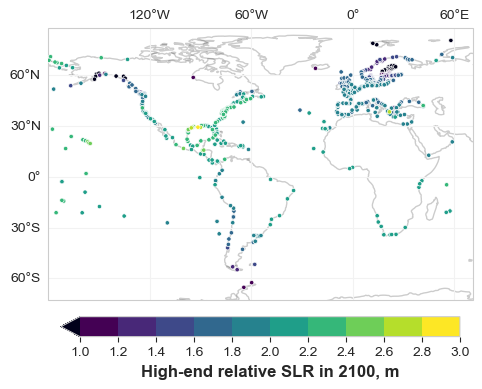

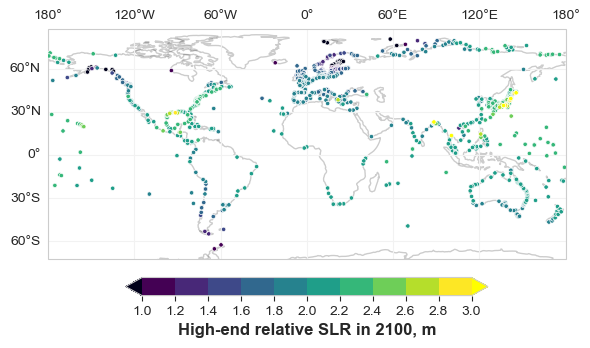

In [17]:
# Map of high-end projections
for gauges_cities_megacities in [ 'megacities', 'cities', 'gauges']:
    for region in ['asia', 'other', None]:
        print(gauges_cities_megacities, region)
        d25a.fig_proj_2100_map(proj_col_str='rsl_high', gauges_cities_megacities=gauges_cities_megacities, region=region)


(<Figure size 800x500 with 1 Axes>, <Axes: xlabel='Relative SLR in 2100, m'>)

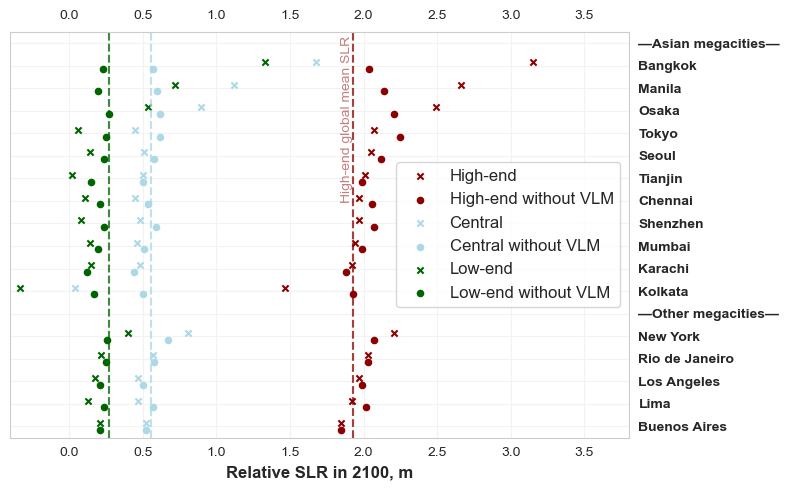

In [18]:
# Plot projections for megacities
d25a.fig_proj_2100_megacities()

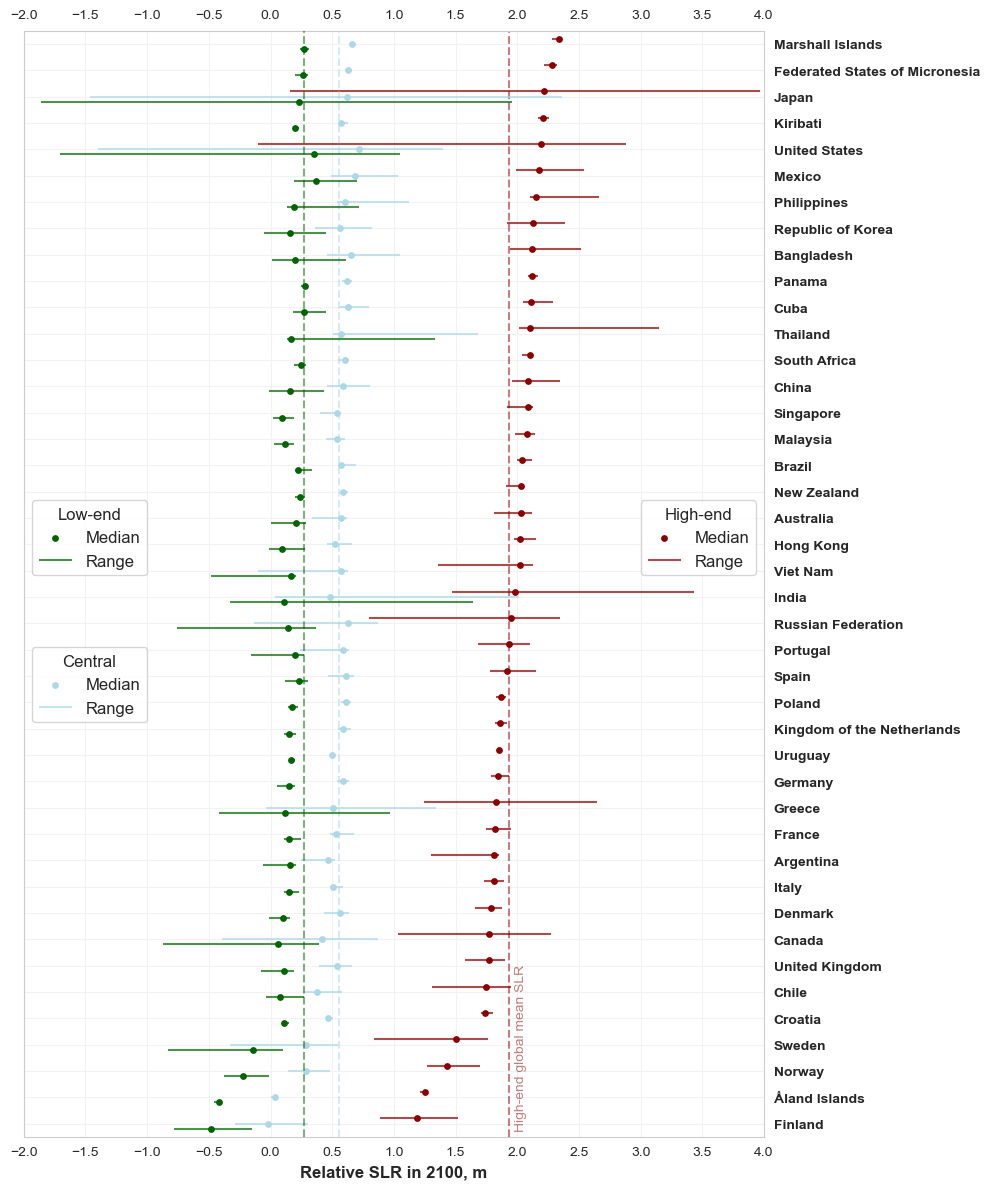

In [19]:
# Plot projections for countries
fig, axs = d25a.fig_country_stats()

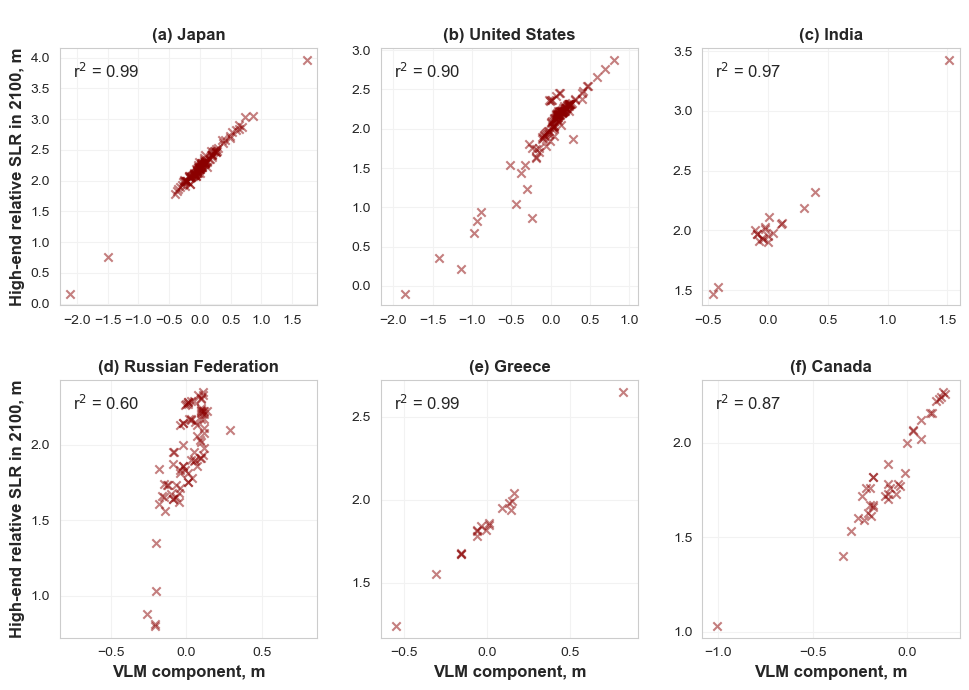

In [20]:
# RSL vs VLM
fig, axs = d25a.fig_rsl_vs_vlm()

## Misc

PearsonRResult(statistic=np.float64(-0.010392107607740907), pvalue=np.float64(0.829865671006521))
SignificanceResult(statistic=np.float64(0.020118028019892775), pvalue=np.float64(0.5371084888604876))


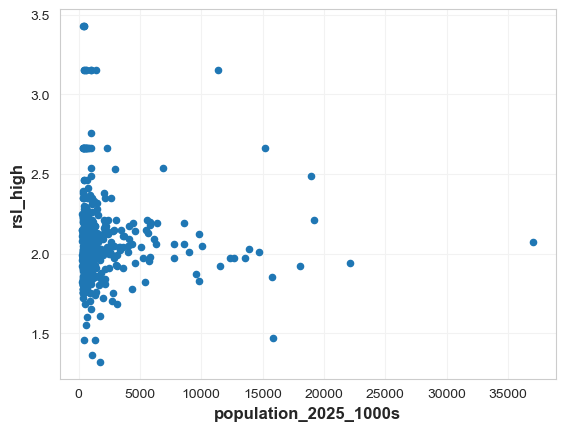

In [21]:
# Correlation between population and high-end projection
in_fn = d25a.DATA_DIR / 'year_2100' / f'cities_2100_d25a.csv'
all_df = pd.read_csv(in_fn)
all_df = all_df.dropna()
all_df.plot.scatter(x='population_2025_1000s', y='rsl_high')
print(stats.pearsonr(all_df['population_2025_1000s'], all_df['rsl_high']))
print(stats.kendalltau(all_df['population_2025_1000s'], all_df['rsl_high']))

In [22]:
! date

Fri Apr 25 13:25:02 +08 2025
